In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook','grid'])
from scipy.integrate import solve_ivp

In [10]:
def ode_system(T):
    '''
    Input:
        T: 1D array containing the Half-Lifes of each element.
    Output:
        The system of differential equations with time 
        as the independent variable.
    '''
    l = np.log(2)/T #Calculating the lambdas of each element.
    number = len(l)
    
    def dSdt(t,S):
        dndt = np.zeros_like(l)
        for i in range(number):
            if i == 0:
                dndt[i] = -l[i]*S[i]
            else:
                dndt[i] = l[i-1]*S[i-1] - l[i]*S[i]
        return dndt
    return dSdt

def plotting(sollution,t):
    '''
    Input: 
        sollution: dictionary. The result of the solve_ivp function.
    Output:
        Printing a figure containing the number of atoms with respect to 
        time for each element.
    '''
    n = len(sollution['y'])
    plt.figure(figsize=(8, 6))
    for i in range(n):
        plt.plot(t, np.round(sollution['y'][i]), label=f'N{str(i+1)}')
    plt.legend(frameon=True, edgecolor='black', fontsize=10)
    plt.xlabel('Time')
    plt.ylabel('Number of atoms')
    plt.show()

In [11]:
T = [1,2,3,np.inf] #The last element is stable.
N0 = [1000,0,0,0]
t = np.linspace(0.1,40,200) # hours

In [12]:
res = solve_ivp(ode_system(T), y0=N0, t_span=(min(t),max(t)), t_eval=t)

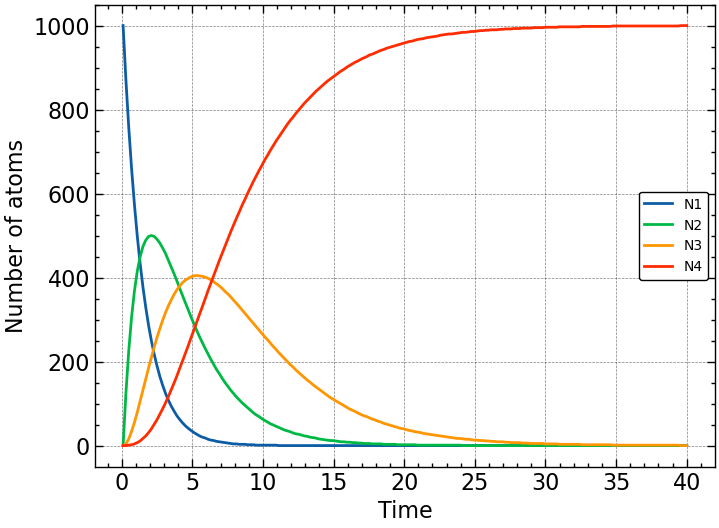

In [13]:
plotting(res,t)